In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
pd.set_option('Display.max_columns', 27)

In [3]:
df = pd.read_csv('..//Dados/New_dados_challenge.csv')
df

,Idade,Salario_anual,Situacao_prop,Tempo_trabalho,Motivo_emprest,Pont_emprest,Total_emprest,Tx_juros,Possib_inadimp,Renda_pecentual,Periodo,Inadimplente
0,32.0,22704.0,Rent,4.0,Debtconsolidation,B,6800.0,NaN,0.0,0.30,8,N
1,34.0,222000.0,Mortgage,0.0,Medical,A,13000.0,8.49,0.0,0.06,7,N
2,35.0,48000.0,Own,6.0,Homeimprovement,C,4200.0,13.61,0.0,0.09,7,N
3,40.0,52000.0,Rent,2.0,Education,F,15000.0,18.62,1.0,0.29,17,Y
4,22.0,24000.0,Own,3.0,Education,B,6000.0,11.49,0.0,0.25,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...
34480,22.0,59004.0,Rent,3.0,Education,B,5000.0,11.11,1.0,0.08,3,N
34481,28.0,36000.0,Mortgage,12.0,Medical,C,1925.0,15.23,0.0,0.05,8,Y
34482,30.0,95000.0,Mortgage,6.0,Homeimprovement,B,21000.0,11.99,0.0,0.22,5,N
34483,27.0,45600.0,Mortgage,6.0,Venture,A,15350.0,8.90,0.0,0.34,10,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            34165 non-null  float64
 1   Salario_anual    34150 non-null  float64
 2   Situacao_prop    34154 non-null  object 
 3   Tempo_trabalho   33231 non-null  float64
 4   Motivo_emprest   34174 non-null  object 
 5   Pont_emprest     34176 non-null  object 
 6   Total_emprest    34154 non-null  float64
 7   Tx_juros         30859 non-null  float64
 8   Possib_inadimp   34142 non-null  float64
 9   Renda_pecentual  34170 non-null  float64
 10  Periodo          34485 non-null  int64  
 11  Inadimplente     34119 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


> Como é possivel observar, existem muitas colunas com dados faltantes. A coluna que apresenta a maior quantidade de dados faltantes é a coluna Tx_juros com mais de 3600 registros nulos. 

In [5]:
# Realizando a seleção dos registros nulos na variável Target e os removendo.
df['Inadimplente'].fillna('', inplace = True)
index = df.query("Inadimplente == ''").index
df.drop(index = index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34119 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            33836 non-null  float64
 1   Salario_anual    33819 non-null  float64
 2   Situacao_prop    33820 non-null  object 
 3   Tempo_trabalho   32902 non-null  float64
 4   Motivo_emprest   33840 non-null  object 
 5   Pont_emprest     33846 non-null  object 
 6   Total_emprest    33820 non-null  float64
 7   Tx_juros         30563 non-null  float64
 8   Possib_inadimp   33814 non-null  float64
 9   Renda_pecentual  33835 non-null  float64
 10  Periodo          34119 non-null  int64  
 11  Inadimplente     34119 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.4+ MB


> Após realizar a remoção dos registros com dados faltantes na coluna Inadimplente, ainda existem 4 colunas que contêm dados nulos e que precisam do mesmo método de tratamento aplicado anteriomente. Após isso, tratarei as demais colunas por meio da subistituição dos valores pela média ou mediana. 

> Essas colunas são: **Situacao_prop**, **Motivo_emprest**, **Pont_emprest** e **Possib_inadimp**.

In [6]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Situação_prop.
df['Situacao_prop'].fillna('', inplace = True)
index = df.query("Situacao_prop == ''").index
df.drop(index = index, inplace = True)

In [7]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Motivo_emprest.
df['Motivo_emprest'].fillna('', inplace = True)
index = df.query("Motivo_emprest == ''").index
df.drop(index = index, inplace = True)

In [8]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Pont_emprest.
df['Pont_emprest'].fillna('', inplace = True)
index = df.query("Pont_emprest == ''").index
df.drop(index = index, inplace = True)

In [9]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Possib_inadimp.
df['Possib_inadimp'].fillna('', inplace = True)
index = df.query("Possib_inadimp == ''").index
df.drop(index = index, inplace = True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33129 entries, 0 to 33128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            32952 non-null  float64
 1   Salario_anual    32966 non-null  float64
 2   Situacao_prop    33129 non-null  object 
 3   Tempo_trabalho   32049 non-null  float64
 4   Motivo_emprest   33129 non-null  object 
 5   Pont_emprest     33129 non-null  object 
 6   Total_emprest    32963 non-null  float64
 7   Tx_juros         29807 non-null  float64
 8   Possib_inadimp   33129 non-null  object 
 9   Renda_pecentual  32966 non-null  float64
 10  Periodo          33129 non-null  int64  
 11  Inadimplente     33129 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 3.0+ MB


> Depois de verificar os valores da média e da mediana da coluna **Tx_juros** e encontrar valores bem próximos, acredito que seja razoável substituir os valores faltantes por 11%.

> Na coluna **Tempo_trabalho** também apresenta comportamento semelhante e os resultados relativos a média e mediana são bem próximos, mesmo contendo Outlier. Deste modo, irei completar essas linhas nulas com 4 anos.

In [10]:
# Substituindo os valores faltantes da coluna tx de juros.
df['Tx_juros'].fillna(11, inplace = True)

In [11]:
# Substituindo os valores Nan da coluna Tempo de trabalho
df['Tempo_trabalho'].fillna(4, inplace = True)

> As demais colunas terão os dados ausentes substituídos pela **mediana** dos valores presentes na coluna, visto que são colunas que podem apresentar **Outliers**, além de possuir uma variação considerável nos dados, o que pode **distorcer a média**.

In [12]:
# Calculando a mediana e substituindo os valores faltantes(Salário anual)
mediana = df['Salario_anual'].median()
df['Salario_anual'].fillna(mediana, inplace = True)

In [13]:
# Calculando a mediana e substituindo os valores faltantes(Total Empréstimo)
mediana = df['Total_emprest'].median()
df['Total_emprest'].fillna(mediana, inplace = True)

In [14]:
# Calculando a mediana e substituindo os valores faltantes(Renda Percentual)
mediana = df['Renda_pecentual'].median()
df['Renda_pecentual'].fillna(mediana, inplace = True)

In [15]:
# Calculando a mediana e sustituindo os valores faltantes (Idade)
mediana = df['Idade'].median()
df['Idade'].fillna(mediana, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33129 entries, 0 to 33128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            33129 non-null  float64
 1   Salario_anual    33129 non-null  float64
 2   Situacao_prop    33129 non-null  object 
 3   Tempo_trabalho   33129 non-null  float64
 4   Motivo_emprest   33129 non-null  object 
 5   Pont_emprest     33129 non-null  object 
 6   Total_emprest    33129 non-null  float64
 7   Tx_juros         33129 non-null  float64
 8   Possib_inadimp   33129 non-null  object 
 9   Renda_pecentual  33129 non-null  float64
 10  Periodo          33129 non-null  int64  
 11  Inadimplente     33129 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 3.0+ MB


In [17]:
df.isnull().sum()

Idade              0
Salario_anual      0
Situacao_prop      0
Tempo_trabalho     0
Motivo_emprest     0
Pont_emprest       0
Total_emprest      0
Tx_juros           0
Possib_inadimp     0
Renda_pecentual    0
Periodo            0
Inadimplente       0
dtype: int64

As colunas com dados ausentes foram tratadas e agora é possível processeguir com as próxima etapas.

## Visualizando a distribuição das variáveis

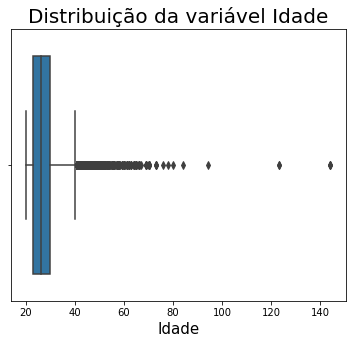

In [18]:
# Boxplot da variável Idade.
ax = sns.boxplot(x = 'Idade', data = df)
ax.figure.set_size_inches(6,5)
ax.set_title('Distribuição da variável Idade', fontsize = 20)
ax.set_xlabel('Idade', fontsize = 15)
ax = ax

> Existem registros de clientes com **mais de 120 anos**. Essas linhas **serão removidas** do conjunto de dados por se tratar de **Outliers**.

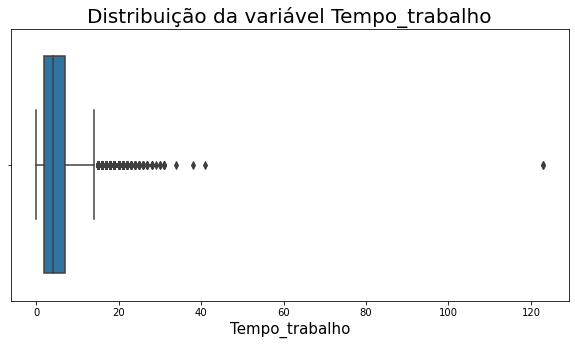

In [19]:
# Boxplot da variável Tempo_trabalho.
ax = sns.boxplot(x = 'Tempo_trabalho', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Tempo_trabalho', fontsize = 20)
ax.set_xlabel('Tempo_trabalho', fontsize = 15)
ax = ax

> Nesta variável também existem valores que estão muito fora da realidade e por tanto, também serão removidos.

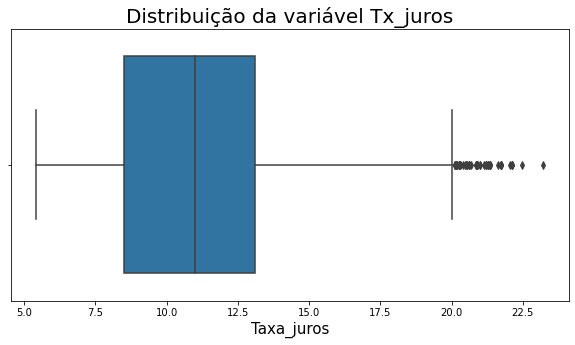

In [20]:
# Boxplot da variável Tx_juros.
ax = sns.boxplot(x = 'Tx_juros', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Tx_juros', fontsize = 20)
ax.set_xlabel('Taxa_juros', fontsize = 15)
ax = ax

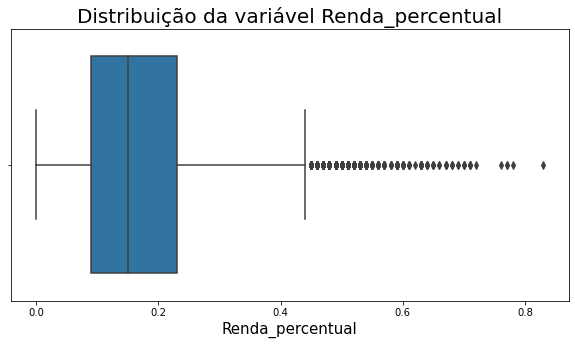

In [21]:
# Boxplot da variável Renda_pecentual.
ax = sns.boxplot(x = 'Renda_pecentual', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Renda_percentual', fontsize = 20)
ax.set_xlabel('Renda_percentual', fontsize = 15)
ax = ax

> Apenas as colunas **Idade** e **Tempo_trabalho** apresentaram Outliers, esses registros serão removidos do conjunto de dados.

In [22]:
# Removendo as linhas dos Outliers da Idade
index = df.query('Idade > 100').index
df.drop(index = index, inplace = True)

In [23]:
# Removendo as linhas dos Outliers da coluna Tempo_trabalho
index = df.query('Tempo_trabalho > 60').index
df.drop(index = index, inplace = True)

In [24]:
# Observando as variáveis categóricas
for column in df[['Situacao_prop','Motivo_emprest','Pont_emprest','Inadimplente']].columns:
    print('------'*9)
    print(column)
    print(df[column].unique())

------------------------------------------------------
Situacao_prop
['Rent' 'Mortgage' 'Own' 'Other']
------------------------------------------------------
Motivo_emprest
['Debtconsolidation' 'Medical' 'Homeimprovement' 'Education' 'Personal'
 'Venture']
------------------------------------------------------
Pont_emprest
['B' 'A' 'C' 'F' 'D' 'E' 'G']
------------------------------------------------------
Inadimplente
['N' 'Y']


In [25]:
# Encoding das variáveis qualitativas.
df = pd.get_dummies(data = df, columns = ['Situacao_prop','Motivo_emprest','Pont_emprest'])

In [26]:
# Reorganizando as variáveis.
df = df[['Idade', 'Salario_anual', 'Tempo_trabalho', 'Total_emprest', 'Tx_juros',
       'Possib_inadimp', 'Renda_pecentual', 'Periodo', 'Situacao_prop_Mortgage', 'Situacao_prop_Other', 'Situacao_prop_Own',
       'Situacao_prop_Rent', 'Motivo_emprest_Debtconsolidation',
       'Motivo_emprest_Education', 'Motivo_emprest_Homeimprovement',
       'Motivo_emprest_Medical', 'Motivo_emprest_Personal',
       'Motivo_emprest_Venture', 'Pont_emprest_A', 'Pont_emprest_B',
       'Pont_emprest_C', 'Pont_emprest_D', 'Pont_emprest_E', 'Pont_emprest_F',
       'Pont_emprest_G','Inadimplente']]
df.head()

,Idade,Salario_anual,Tempo_trabalho,Total_emprest,Tx_juros,Possib_inadimp,Renda_pecentual,Periodo,Situacao_prop_Mortgage,Situacao_prop_Other,Situacao_prop_Own,Situacao_prop_Rent,Motivo_emprest_Debtconsolidation,Motivo_emprest_Education,Motivo_emprest_Homeimprovement,Motivo_emprest_Medical,Motivo_emprest_Personal,Motivo_emprest_Venture,Pont_emprest_A,Pont_emprest_B,Pont_emprest_C,Pont_emprest_D,Pont_emprest_E,Pont_emprest_F,Pont_emprest_G,Inadimplente
0,32.0,22704.0,4.0,6800.0,11.00,0.0,0.30,8,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,N
1,34.0,222000.0,0.0,13000.0,8.49,0.0,0.06,7,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,N
2,35.0,48000.0,6.0,4200.0,13.61,0.0,0.09,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,N
3,40.0,52000.0,2.0,15000.0,18.62,1.0,0.29,17,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,Y
4,22.0,24000.0,3.0,6000.0,11.49,0.0,0.25,4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,N


In [27]:
# Aplicando o Label Encoder na variável Inadimplente (N:0 / Y:1).
from sklearn.preprocessing import LabelEncoder

df['Inadimplente'] = LabelEncoder().fit_transform(df['Inadimplente'])
df.head()

,Idade,Salario_anual,Tempo_trabalho,Total_emprest,Tx_juros,Possib_inadimp,Renda_pecentual,Periodo,Situacao_prop_Mortgage,Situacao_prop_Other,Situacao_prop_Own,Situacao_prop_Rent,Motivo_emprest_Debtconsolidation,Motivo_emprest_Education,Motivo_emprest_Homeimprovement,Motivo_emprest_Medical,Motivo_emprest_Personal,Motivo_emprest_Venture,Pont_emprest_A,Pont_emprest_B,Pont_emprest_C,Pont_emprest_D,Pont_emprest_E,Pont_emprest_F,Pont_emprest_G,Inadimplente
0,32.0,22704.0,4.0,6800.0,11.00,0.0,0.30,8,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,34.0,222000.0,0.0,13000.0,8.49,0.0,0.06,7,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,35.0,48000.0,6.0,4200.0,13.61,0.0,0.09,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,40.0,52000.0,2.0,15000.0,18.62,1.0,0.29,17,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,22.0,24000.0,3.0,6000.0,11.49,0.0,0.25,4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


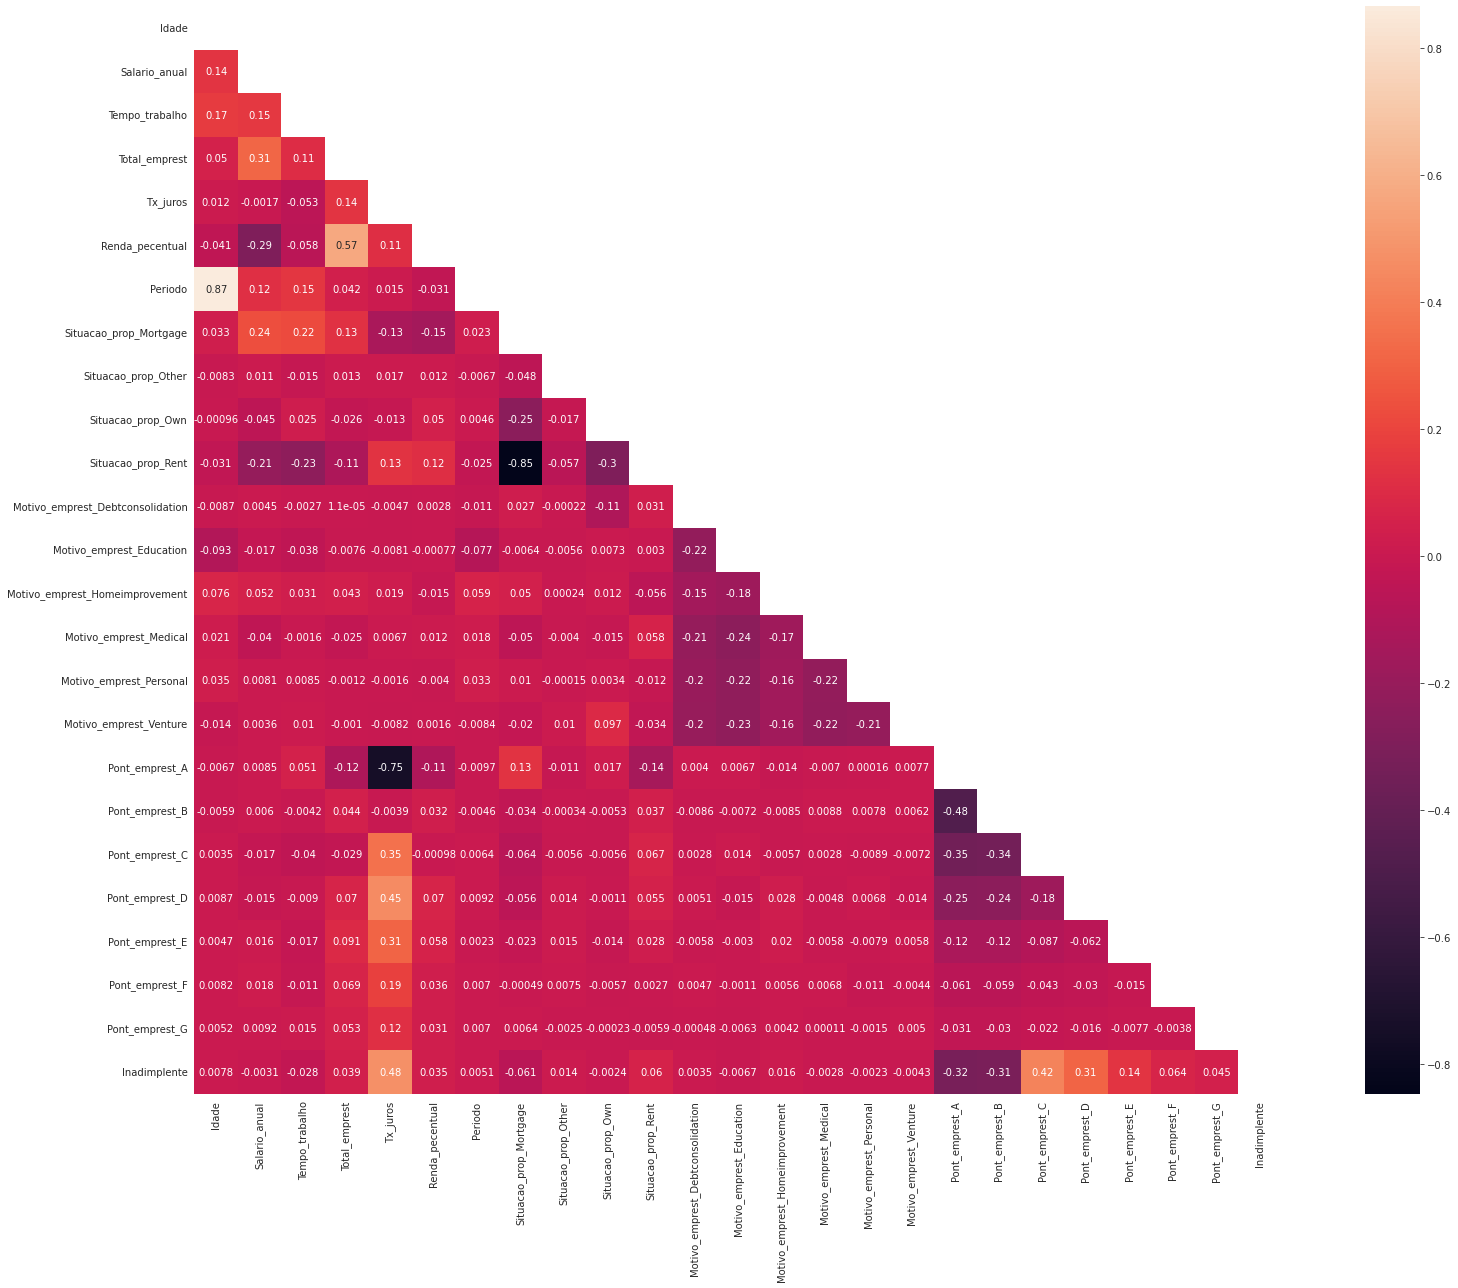

In [28]:
# Plotando a correlação entre as variáveis
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax =plt.subplots(figsize=(30,20))
    ax = sns.heatmap(corr, mask = mask, square = True, annot = True)

> A correlação entre as variáveis presentes neste dataset é fraca em sua grande maioria, contudo, existem alguns pontos isolados que podemos observar um correlação forte.

## Modelagem dos dados

In [29]:
# Realizando a divisão dos dados
X = df.drop(columns = 'Inadimplente')
y = df['Inadimplente']

In [30]:
#Normalização dos dados.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1, columns = X.columns)
X1

,Idade,Salario_anual,Tempo_trabalho,Total_emprest,Tx_juros,Possib_inadimp,Renda_pecentual,Periodo,Situacao_prop_Mortgage,Situacao_prop_Other,Situacao_prop_Own,Situacao_prop_Rent,Motivo_emprest_Debtconsolidation,Motivo_emprest_Education,Motivo_emprest_Homeimprovement,Motivo_emprest_Medical,Motivo_emprest_Personal,Motivo_emprest_Venture,Pont_emprest_A,Pont_emprest_B,Pont_emprest_C,Pont_emprest_D,Pont_emprest_E,Pont_emprest_F,Pont_emprest_G
0,0.694316,-0.823326,-0.190760,-0.441258,-0.002528,-0.527961,1.220195,0.540705,-0.838149,-0.056929,-0.293930,0.990804,2.288851,-0.496582,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044
1,1.017661,2.982747,-1.198072,0.541662,-0.818849,-0.527961,-1.033750,0.294137,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,2.088368,-0.451323,-0.461127,1.421223,-0.686849,-0.497196,-0.353812,-0.174521,-0.086147,-0.044
2,1.179334,-0.340233,0.312896,-0.853450,0.846315,-0.527961,-0.752007,0.294137,-0.838149,-0.056929,3.402174,-1.009282,-0.436900,-0.496582,2.832855,-0.478843,-0.451323,-0.461127,-0.703619,-0.686849,2.011278,-0.353812,-0.174521,-0.086147,-0.044
3,1.987697,-0.263843,-0.694416,0.858733,2.475704,1.894079,1.126280,2.759818,-0.838149,-0.056929,-0.293930,0.990804,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,-0.686849,-0.497196,-0.353812,-0.174521,11.608010,-0.044
4,-0.922411,-0.798575,-0.442588,-0.568086,0.156833,-0.527961,0.750623,-0.445567,-0.838149,-0.056929,3.402174,-1.009282,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33117,-0.922411,-0.130083,-0.442588,-0.726622,0.033247,1.894079,-0.845921,-0.692136,-0.838149,-0.056929,-0.293930,0.990804,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044
33118,0.047625,-0.569404,1.823863,-1.214118,1.373184,-0.527961,-1.127664,0.540705,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,2.088368,-0.451323,-0.461127,-0.703619,-0.686849,2.011278,-0.353812,-0.174521,-0.086147,-0.044
33119,0.370970,0.557353,0.312896,1.809946,0.319447,-0.527961,0.468880,-0.198999,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,2.832855,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044
33120,-0.114048,-0.386067,0.312896,0.914220,-0.685506,-0.527961,1.595852,1.033841,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,-0.478843,-0.451323,2.168599,1.421223,-0.686849,-0.497196,-0.353812,-0.174521,-0.086147,-0.044


In [31]:
# Observação da distribuição dos dados

total = df['Inadimplente'].count()
inadimplentes = df.query('Inadimplente == 1')['Inadimplente'].count()
n_inadimplente = df.query('Inadimplente==0')['Inadimplente'].count()

print('O dataset contêm um total de %d linhas'% total)
print('Onde %d linhas são de clientes não inadimplentes e corresponde a %.2f%% dos dados.'% (n_inadimplente, (n_inadimplente/total)*100))
print('Enquanto %d linhas são clientes inadimplentes, correspondendo a %.2f%% dos dados.'% (inadimplentes,(inadimplentes/total)*100))

O dataset contêm um total de 33122 linhas
Onde 27285 linhas são de clientes não inadimplentes e corresponde a 82.38% dos dados.
Enquanto 5837 linhas são clientes inadimplentes, correspondendo a 17.62% dos dados.


> Existem um claro desbalanceamento entre as classes, esse desbalanceamento será tratado com uma técnica de **Oversampling** na qual irá equilibrá-las.

In [32]:
# Realizando o import do Smote
from imblearn.over_sampling import SMOTE

# Instanciando um objeto Smote()
smt = SMOTE()
# Aplicando o Resample das classes
X1,y = smt.fit_resample(X1,y)

# Visualizando a nova distribuição das classes
y.value_counts()

0    27285
1    27285
Name: Inadimplente, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
#Definindo uma SEED
SEED = 1457
np.random.seed(SEED)

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = SEED, stratify = y)

In [34]:
# Importando os modelos 
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importando as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
# Definindo as funções para rodar o modelo e gerar as métricas.

def modelo(classificador):
    modelo = classificador
    modelo.fit(X_train, y_train)
    return modelo

def predicao(modelo):
    y_pred = modelo.predict(X_test)
    return y_pred

def metricas(y_test, y_pred):
    acuracia = accuracy_score(y_test, y_pred)*100
    precisao = precision_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    
    print('A acurácia do modelo foi de %.2f%%' %acuracia)
    print('A precisão do modelo foi de %.2f%%'%precisao)
    print('A taxa de recall do modelo foi de %.2f%%'% recall)
    print('A taxa de balanceamento do modelo foi de %.2f%%'%f1)
    
    mc = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = mc)
    display.plot()
    

In [36]:
# Função de plotagem da curva roc
def auc_roc(modelo, X_test, y_test):
    prob = modelo.predict_proba(X_test)[:,1]   # Calculo da probabilidade
    tfp, tvp, limite = roc_curve(y_test, prob) # Calculo das tx de verdadeiros positivos e falsos positivos
    auc = roc_auc_score(y_test, prob)          # Valor da AUC

# Plotando a curva
    plt.subplots(1, figsize = (15,10))
    plt.title('Curva ROC', fontsize = 20)
    plt.plot(tfp, tvp, label = 'LR, auc =%s'%(auc))
    plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
    plt.plot([0,0],[1,0], color ='green', lw= 2, linestyle = '--'),plt.plot([1,1], color ='green', lw= 2, linestyle = '--') 
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

A acurácia do modelo foi de 50.00%
A precisão do modelo foi de 50.00%
A taxa de recall do modelo foi de 100.00%
A taxa de balanceamento do modelo foi de 66.66%


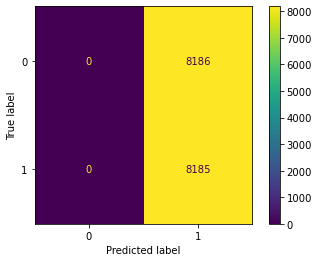

In [37]:
# Rodando o modelo Dummy
dummy = modelo(DummyClassifier(random_state = SEED))
dummy_pred = predicao(dummy)
metricas(y_test, dummy_pred)

A acurácia do modelo foi de 88.93%
A precisão do modelo foi de 88.65%
A taxa de recall do modelo foi de 89.29%
A taxa de balanceamento do modelo foi de 88.96%


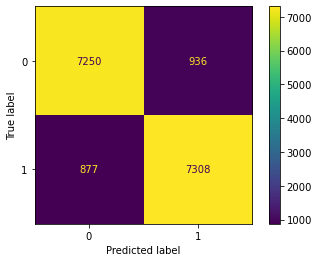

In [38]:
# Rodando o modelo DecisionTree
dct = modelo(DecisionTreeClassifier(random_state= SEED))
dct_pred = predicao(dct)
metricas(y_test, dct_pred)

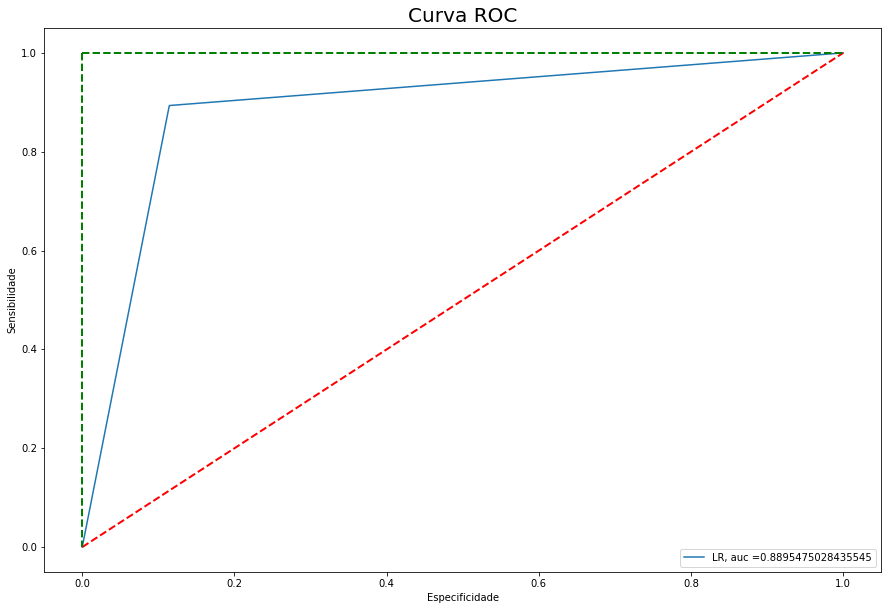

In [39]:
#Plotando a curva roc do DecisionTree
auc_roc(dct, X_test, y_test)

A acurácia do modelo foi de 90.10%
A precisão do modelo foi de 84.74%
A taxa de recall do modelo foi de 97.80%
A taxa de balanceamento do modelo foi de 90.81%


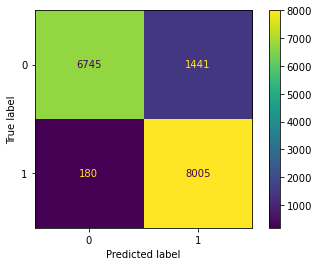

In [40]:
#Rodando o modelo RandomForest
rf = modelo(RandomForestClassifier(random_state= SEED))
rf_pred = predicao(rf)
metricas(y_test, rf_pred)

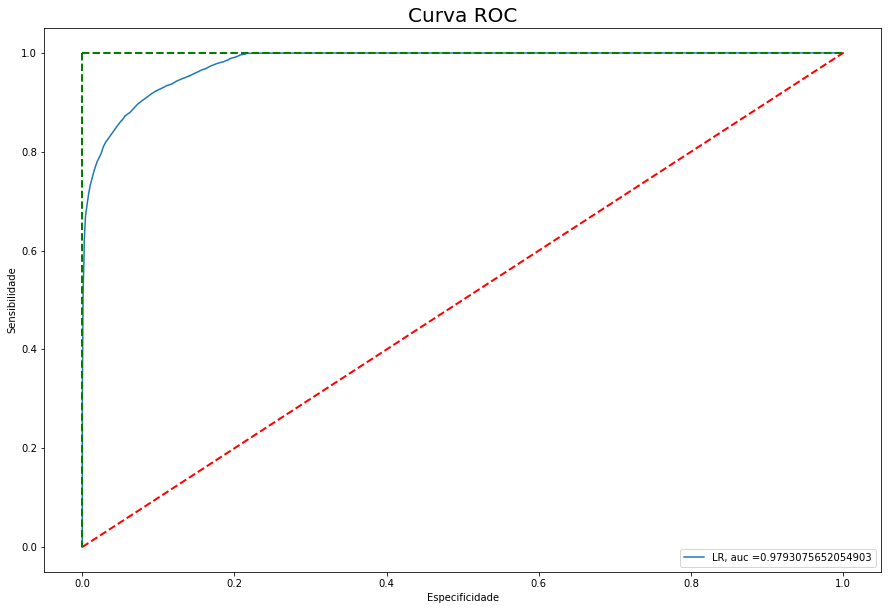

In [41]:
# Plotando a curva para o RandomForest
auc_roc(rf, X_test, y_test)

A acurácia do modelo foi de 89.26%
A precisão do modelo foi de 83.13%
A taxa de recall do modelo foi de 98.52%
A taxa de balanceamento do modelo foi de 90.17%


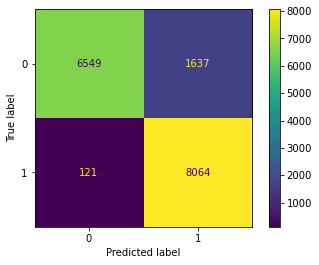

In [42]:
# Rodando o GradientBoosting
gb = modelo(GradientBoostingClassifier(random_state= SEED))
gb_pred = predicao(gb)
metricas(y_test, gb_pred)

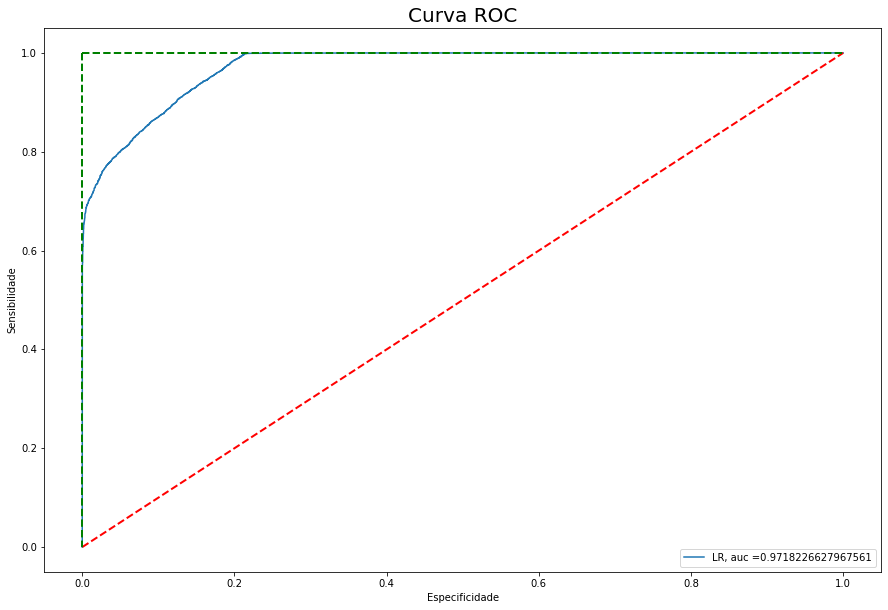

In [43]:
#Plotando a curva para o GrandientBoosting
auc_roc(gb, X_test, y_test)

O problema enfrentado pelo banco está relacionado ao aumento da inadimplência, logo seria primordial que o modelo selecionado seja capaz de diferenciar, com a maior eficácia possível, qual é o provável cliente inadimplente e o não inadimplente.

Neste contexto, acredito que seja interessante  combinar os resultados obtidos com a matrix de confusão, observando os modelos que apresentaram uma melhor classificação dos verdadeiros positivos e falsos negativos, e o valor da área sob a curva, porque quanto melhor o modelo for na diferenciação entre as classes, maior será o valor da **AUC**.

Dentre os modelos testados, o modelo **RandomForestClassifier** e o **GradientBoostingClassifier** apresentaram o melhor desempenho e por isso seguirão para a etapa de otimização. Vale destacar que buscarei otimizar o valor do **auc_roc** em ambos os modelos antes de eleger o melhor.

## Otimização dos modelos

In [44]:
# Importando as ferramentas de otimização e validação
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize

In [45]:
def roda_modelo(parametro):
    n_estimators = parametro[0]
    criterion = parametro[1]
    max_depth = parametro[2]
    min_samples_split = parametro[3]
    min_samples_leaf = parametro[4]
    
    best_rf = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_depth= max_depth,
                                    min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,
                                    random_state = SEED)
    
    best_rf.fit(X_train,y_train)
    
    prob = best_rf.predict_proba(X_test)[:,1]
    
    return -roc_auc_score(y_test, prob)

parametro = [(150, 400), # n_estimators
            ('gini','entropy'), #criterion
            (4, 64, 'log-uniform'), # max_depth
            (4, 120), # min_samples_split
            (2, 120)] # min_samples_leaf

resultado_rf = gp_minimize(roda_modelo, parametro, random_state = SEED,
                           n_calls = 50, n_random_starts= 23)

C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [46]:
resultado_rf.x

[400, 'entropy', 42, 4, 2]

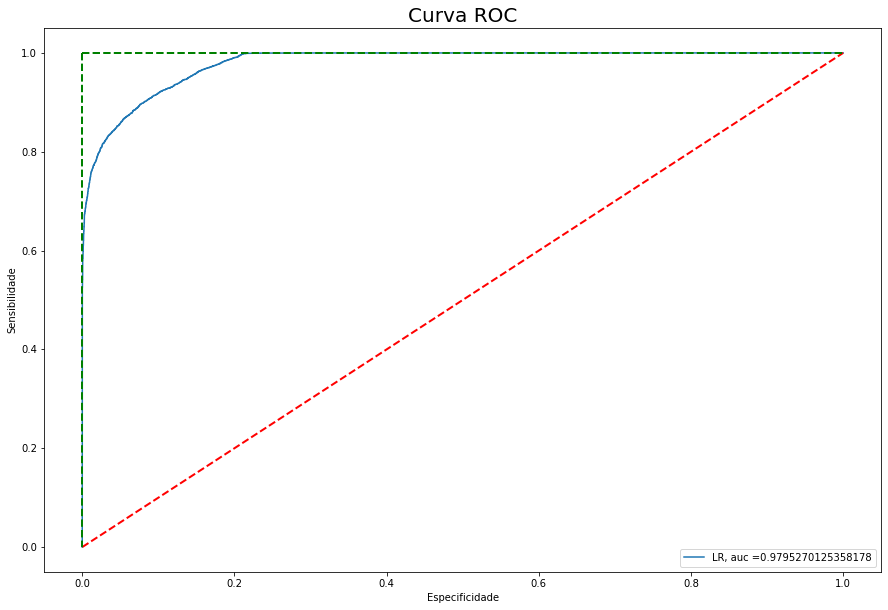

In [47]:
# Treinando o modelo RandomForestClassifier com os melhores parâmetros

rf_otm = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', max_depth= 42,
                                min_samples_split = 4, min_samples_leaf = 2, random_state = SEED)

rf_otm.fit(X_train, y_train)

auc_roc(rf_otm, X_test, y_test)

In [48]:
def roda_modelo2(parametros):
    learning_rate = parametros[0]
    subsample = parametros[1]
    min_samples_split = parametros[2]
    min_samples_leaf = parametros[3]
   
#Instaciando o modelo GradientBoostingClassifier
    best_gb = GradientBoostingClassifier(learning_rate= learning_rate, n_estimators= 500,
                                        subsample= subsample, min_samples_split= min_samples_split,
                                        min_samples_leaf = min_samples_leaf, random_state = SEED)
    best_gb.fit(X_train, y_train)
    
    prob = best_gb.predict_proba(X_test)[:,1]
    
    return -roc_auc_score(y_test, prob)

#Definindo os parametros

parametros = [(1e-5, 1e-1, 'log-uniform'), #learning_rate
             (0.05, 1.0), # subsample
             (0.05, 0.3), # min_samples_split
             (0.02, 0.2)] # min_samples_leaf

#Rodando o otimizador
resultado_gb = gp_minimize(roda_modelo2, parametros, random_state= SEED, n_calls = 40,
                           n_random_starts = 20)    

In [49]:
resultado_gb.x

[0.1, 0.8720919985155454, 0.05, 0.02]

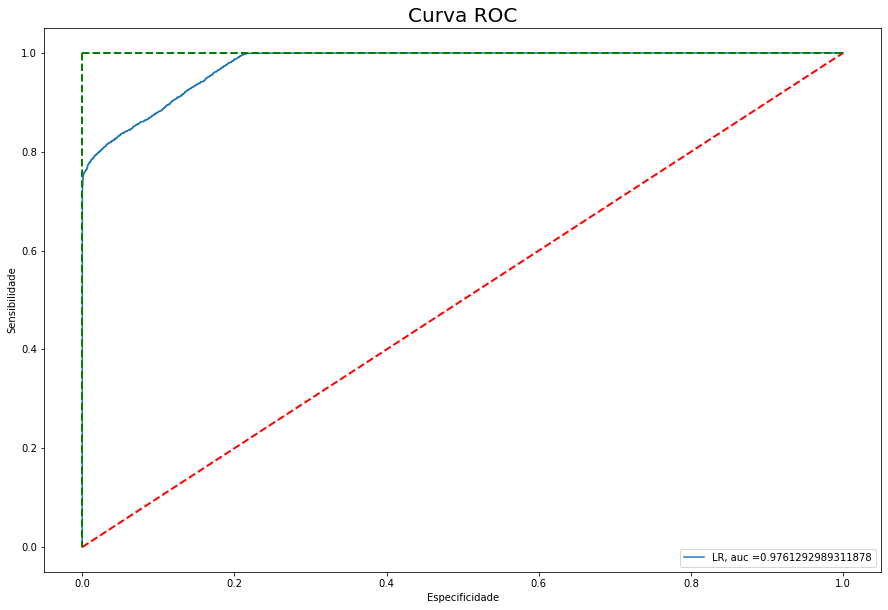

In [50]:
#Treinando o modelo GradientBoostingClassifier

gb_otm = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 500,
                                    subsample= 0.872, min_samples_split= 0.05,
                                    min_samples_leaf = 0.02, random_state = SEED)

gb_otm.fit(X_train, y_train)

auc_roc(gb_otm, X_test, y_test)

Após a realização da otimização dos modelos, o RandomForest se manteve com o melhor **AUC_score** chegando a quase 0.98. Por esse motivo, seguirei com o mesmo para a etapa avalização do modelo desenvolvido, por meio de **cross_validation**.

In [51]:
# Definindo o cv
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state= SEED)

# Calculando o score 
score = cross_val_score(rf_otm, X1, y, cv = cv, scoring = 'roc_auc')

# Calculando a média e o desvio padrão
media = score.mean()*100
desv_pad = score.std()*100

# Observando o intervalo esperado de AUC_score
print('A AUC-ROC média deste modelo é de %.2f%%'%media)
print('Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [%.2f%%, %.2f%%]'%(media - 2*desv_pad, media + 2* desv_pad))

A AUC-ROC média deste modelo é de 98.28%
Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [98.13%, 98.43%]


In [52]:
# Salvando o modelo com pickle
#import pickle

#saida = open('../Modelo/modelo_AluraCash','wb')
#pickle.dump(rf_otm, saida)
#saida.close()